<a href="https://colab.research.google.com/github/TurboGoose/ComputationalMathematics/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Выполнил Коновалов Илья (группа 19.Б13-пу)

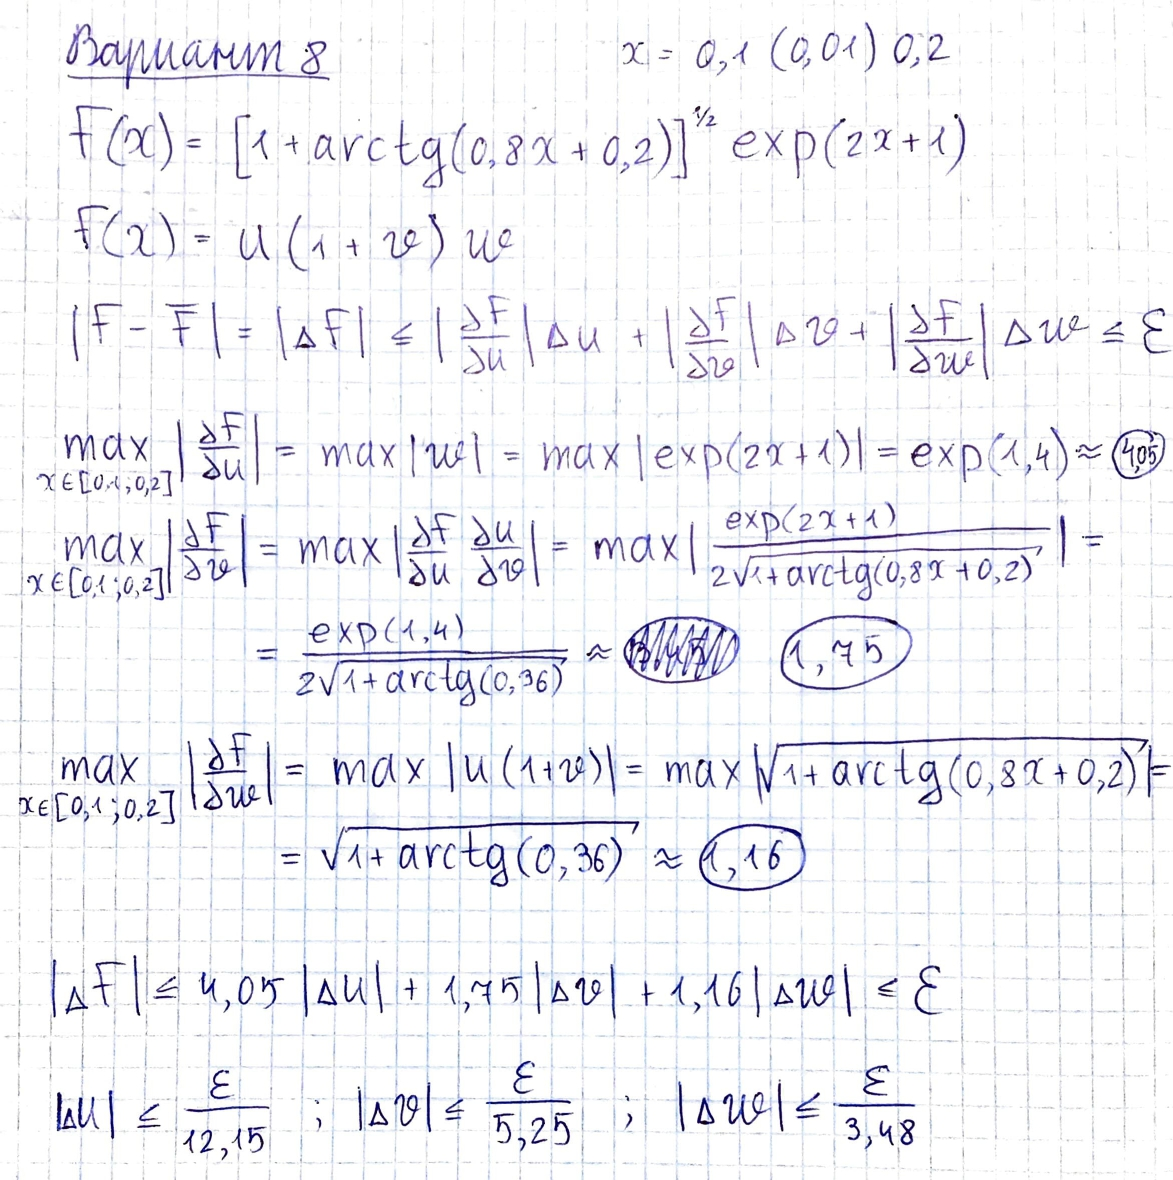

In [1]:
import numpy as np
import pandas as pd
import math as m

EPS = 1.e-6
dU = EPS / 12.15
dV = EPS / 5.25
dW = EPS / 3.48

In [2]:
def sqrt(a, eps=dU):
    x_cur = max(1, a)
    x_next = 0.5 * (x_cur + a / x_cur)
    while abs(x_cur - x_next) >= eps:
        x_cur = x_next
        x_next = 0.5 * (x_cur + a / x_cur)
    return x_cur

In [3]:
def arctg(x, eps=dV):
    k = 0
    if (abs(x) < 1):
        x_cur = x
        row_sum = x_cur
        while abs(x_cur) >= eps:
            k += 1
            x_cur = (-1)**k * x**(2*k + 1) / (2*k + 1)
            row_sum += x_cur
    else:
        x_cur = 1 / x
        row_sum = m.pi/2 * np.sign(x) - x_cur
        while abs(x_cur) >= eps:
            k += 1
            x_cur = (-1)**k * x**(-2*k - 1) / (2*k + 1)
            row_sum -= x_cur
    return row_sum

In [9]:
def exp(x, eps=dW):
    k = 0
    x_cur = 1
    row_sum = x_cur
    while abs(x) >= k + 2 or x_cur >= eps:
        k += 1
        x_cur *= x / k
        row_sum += x_cur
    return row_sum

In [5]:
def f_approx(x):
    return sqrt(1 + arctg(0.8*x + 0.2)) * exp(2*x + 1)

In [6]:
def f_exact(x):
    return m.sqrt(1 + m.atan(0.8*x + 0.2)) * m.exp(2*x + 1)

In [10]:
def calculate(start, stop, step):
    data = {"x":[], "f_exact":[], "f_approx":[], "error":[]}
    for x in np.arange(start, stop, step):
        exact = f_exact(x)
        approx = f_approx(x)
        error = abs(exact - approx)
        data["x"].append(x)
        data["f_exact"].append(exact)
        data["f_approx"].append(approx)
        data["error"].append("{:e}".format(error))
    return pd.DataFrame(data)

In [11]:
calculate(0.1, 0.2, 0.01)

,x,f_exact,f_approx,error
0,0.10,3.746011,3.746011,2.870726e-08
1,0.11,3.832782,3.832782,3.678243e-08
2,0.12,3.921448,3.921448,4.717619e-08
3,0.13,4.012051,4.012051,2.252120e-08
4,0.14,4.104630,4.104630,4.512772e-10
5,0.15,4.199226,4.199226,1.126091e-09
6,0.16,4.295880,4.295880,2.196725e-09
7,0.17,4.394637,4.394637,3.843062e-09
8,0.18,4.495538,4.495538,6.314554e-09
9,0.19,4.598629,4.598629,9.953713e-09
